# Advanced Usage

In [1]:
%load_ext autoreload
%autoreload 2
!rm -rf experiments

In [2]:
import numpy as np
from digital_experiments import experiment

@experiment
def loss_surface(x, y):
    himmelblau = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
    slope = x + y
    return np.log(himmelblau+10) + slope * 0.05

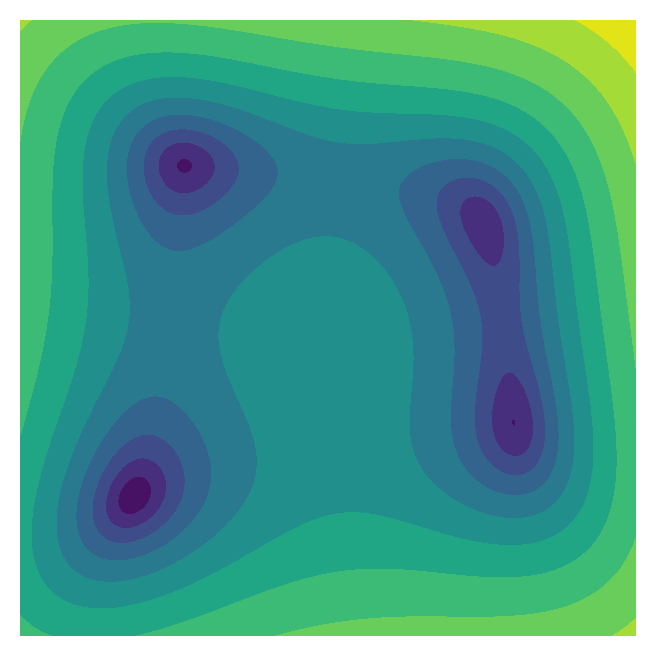

In [4]:
from digital_experiments import dont_record
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


x = np.arange(-6, 6, step=0.05)

xx, yy = np.meshgrid(x, x)
with dont_record():
    zz = loss_surface(xx, yy)

plt.figure(figsize=(4, 4))
plt.contourf(xx, yy, zz, 11)
plt.gca().set_aspect('equal'); plt.axis('off');

In [5]:
from digital_experiments.optmization import optimize_step_for, Real

space = {
    "x": Real(-6, 6),
    "y": Real(-6, 6),
}

random_points = 10
opt_points = 30

for i in range(random_points + opt_points):
    optimize_step_for(
        loss_surface, 
        n_random_points=random_points, 
        space=space
    )


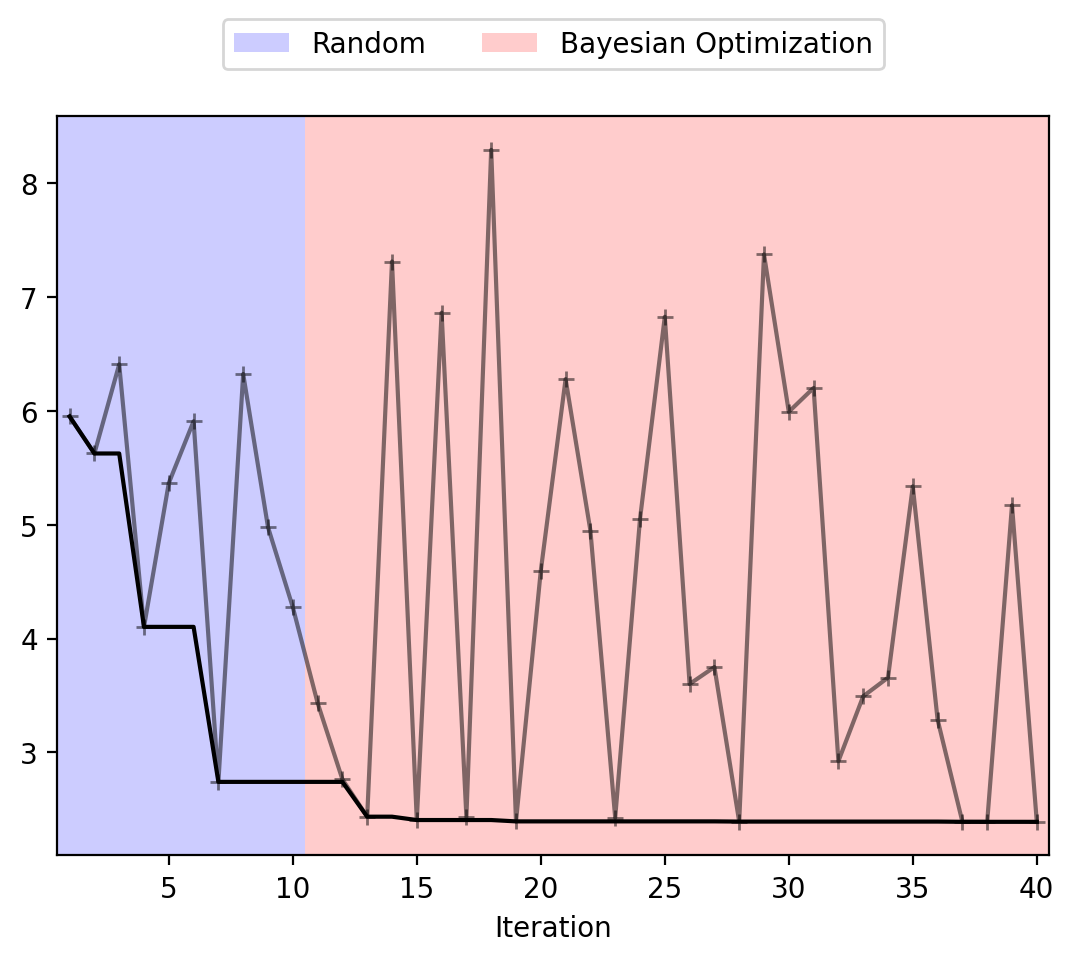

In [6]:
from digital_experiments.plots import track_minimization

track_minimization(loss_surface)


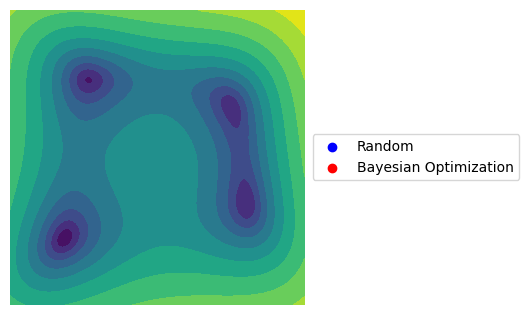

<Figure size 640x480 with 0 Axes>

In [7]:
from digital_experiments.plots import track_trials

def plot_background(*args):
    plt.xlim(-6, 6)
    plt.ylim(-6, 6)
    plt.gca().set_aspect("equal")
    plt.axis("off")
    plt.contourf(xx, yy, zz, 11, zorder=-1)

track_trials("x", "y", loss_surface, callback=plot_background, fps=3)